In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

from src.data import load_dataset

X, y = load_dataset()

# Without tuning

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
precision_accum, recall_accum, f1_accum, support_accum = 0, 0, 0, 0

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    precision_accum += precision
    recall_accum += recall
    f1_accum += f1

n_splits = kf.get_n_splits()
print(f"Average Precision: {precision_accum / n_splits:.2f}")
print(f"Average Recall: {recall_accum / n_splits:.2f}")
print(f"Average F1-Score: {f1_accum / n_splits:.2f}")

5it [00:25,  5.20s/it]

Average Precision: 0.86
Average Recall: 0.86
Average F1-Score: 0.86


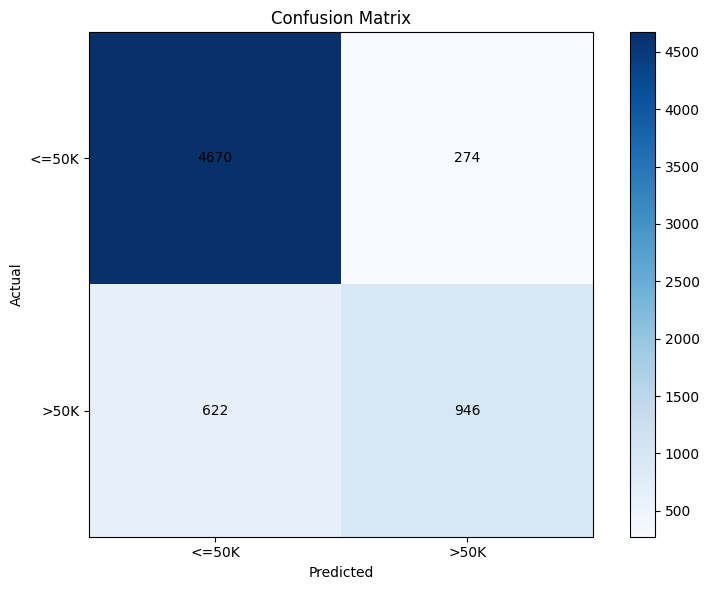

In [ ]:


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['<=50K', '>50K']))
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()